# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2022
## Домашнее задание 4. Доверительные интервалы
### Дедлайн --- 14 ноября

Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается **в 10 баллов**.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps
import math

from tqdm.notebook import tqdm
from typing import Callable

sns.set(font_scale=1.4, style='whitegrid', palette='Set2')

## Задача 1

Сгенерируйте выборку $X_1, ...,X_{100}$ из распределения $P_\theta$.

Для уровня доверия $\alpha = 0.95$ для всех $n \leq 100$
изобразите на графиках в координатах $(n, \theta)$
* Доверительный интервал оценки $\widehat{\theta}$
* График оценки $\widehat{\theta}$
* Точки выборки

Для отрисовки доверительного интервала используйте `plt.fill_between`. Не забывайте про параметр `alpha`.

Для того, чтобы избежать дублирования кода, рекомендуем написать функцию `draw_confidence_interval`, изображающую на графике все необходимое.

In [2]:
N = 100
alpha = 0.95
def draw_confidence_interval(left, right, estimator, sample, title, intervals=None):
    grid = np.arange(1, N + 1)

    plt.figure(figsize=(16, 7))
    plt.fill_between(grid, left, right, alpha=0.5, label=intervals)
    if estimator is not None:
        plt.plot(grid, estimator, label='estimator', c='r')
    if sample is not None:
        plt.scatter(grid, sample, alpha=0.4, label='sample')
    if title is not None:
        plt.title(title, fontsize=20)
    plt.legend(fontsize=14, loc=1)
    plt.xlabel('size of sample', fontsize=14)
    plt.ylabel('estimator', fontsize=14)
    plt.grid(ls=':')

Выполните задание для следующих $P_\theta$ и $\widehat{\theta}$ (формулы доверительных итервалов были получены на семинарах):

### 1. Равномерное распределение, $\theta = 10$, оценка $\widehat{\theta} = X_{(n)}$
Доверительный интервал:
$$
(X_{(n)}, \frac{X_{(n)}}{1 - \frac{u_{\alpha}}{n}})
$$

(-1.0, 20.0)

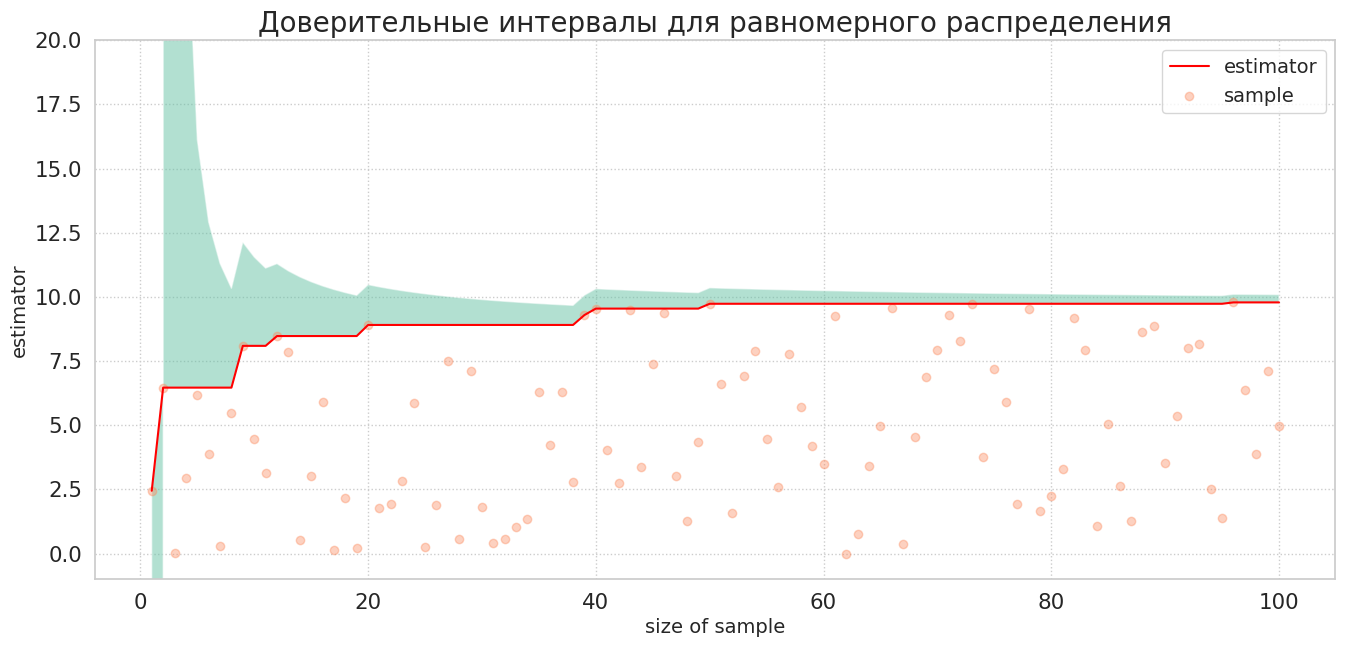

In [3]:
theta = 10
n = np.arange(1, N + 1, dtype=float)
sample_uniform = sps.uniform(loc=0, scale=theta).rvs(size=N)
estimator_uniform = np.maximum.accumulate(sample_uniform)
left_uniform = estimator_uniform
right_uniform = estimator_uniform / (1 - sps.expon.ppf(alpha) / n)
draw_confidence_interval(left_uniform, right_uniform, estimator_uniform, sample_uniform, "Доверительные интервалы для равномерного распределения")
plt.ylim(-1, 20)

### 2. Распределение Коши, $\theta = 10$, оценка — медиана
Доверительный интервал: 
$$
\widehat{\mu} - \frac{\pi}{2\sqrt{n}}u_{\frac{1-\alpha}{2}} < \theta < \widehat{\mu} - \frac{\pi}{2\sqrt{n}}u_{\frac{1+\alpha}{2}}
$$

(4.0, 15.0)

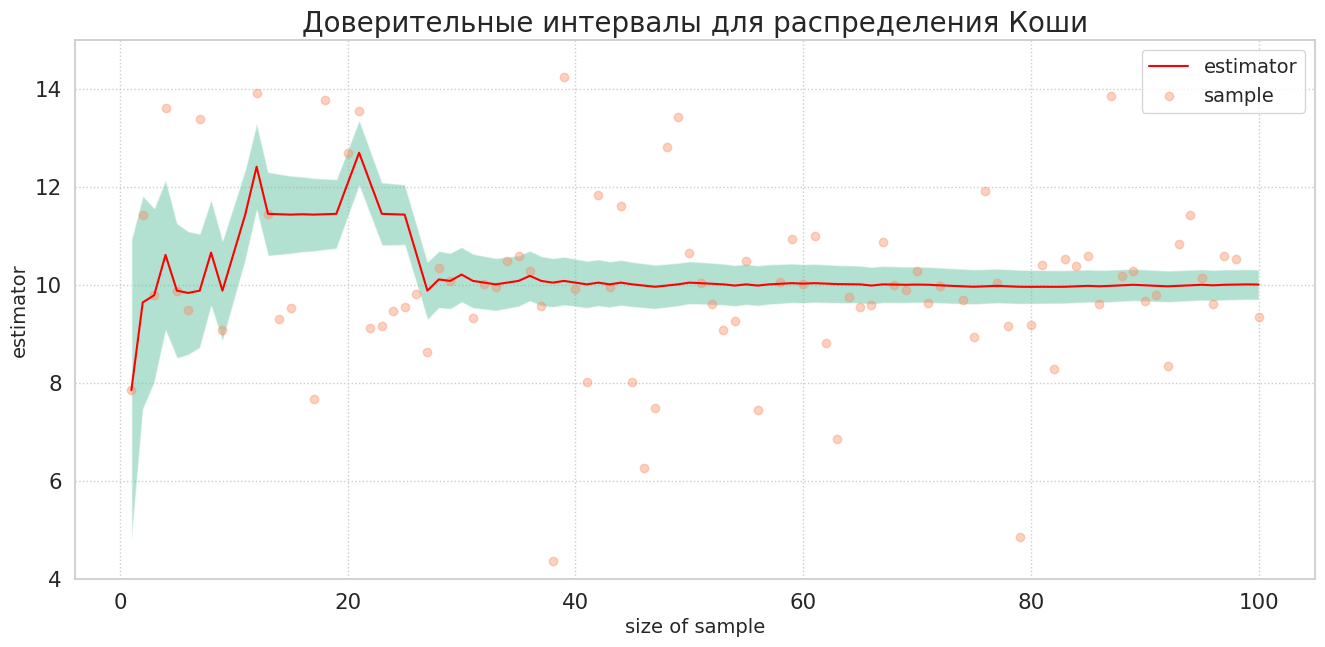

In [4]:
theta = 10
n = np.arange(1, N + 1, dtype=float)
sample_cauchy = sps.cauchy(loc=theta).rvs(size=N)
estimator_cauchy = [np.median(sample_cauchy[:s]) for s in np.arange(1, N + 1)]
left_cauchy = estimator_cauchy - np.pi * np.power(2 * np.sqrt(n), -1) * sps.norm.ppf((1 - alpha) / 2)
right_cauchy = estimator_cauchy - np.pi * np.power(2 * np.sqrt(n), -1) * sps.norm.ppf((1 + alpha) / 2)
draw_confidence_interval(left_cauchy, right_cauchy, estimator_cauchy, sample_cauchy, "Доверительные интервалы для распределения Коши")
plt.ylim(4, 15)

### 3. Распределение Пуассона, $\theta = 10$, оценка $\widehat{\theta} = \overline{X}$
Довериельный интервал для распределения Пуассона 
$$
\overline{X} - \frac{\sqrt{\overline{X}}u_{\frac{1+\alpha}{2}}}{\sqrt{n}} < \theta < \overline{X} - \frac{\sqrt{\overline{X}}u_{\frac{1-\alpha}{2}}}{\sqrt{n}}
$$

(4.0, 16.0)

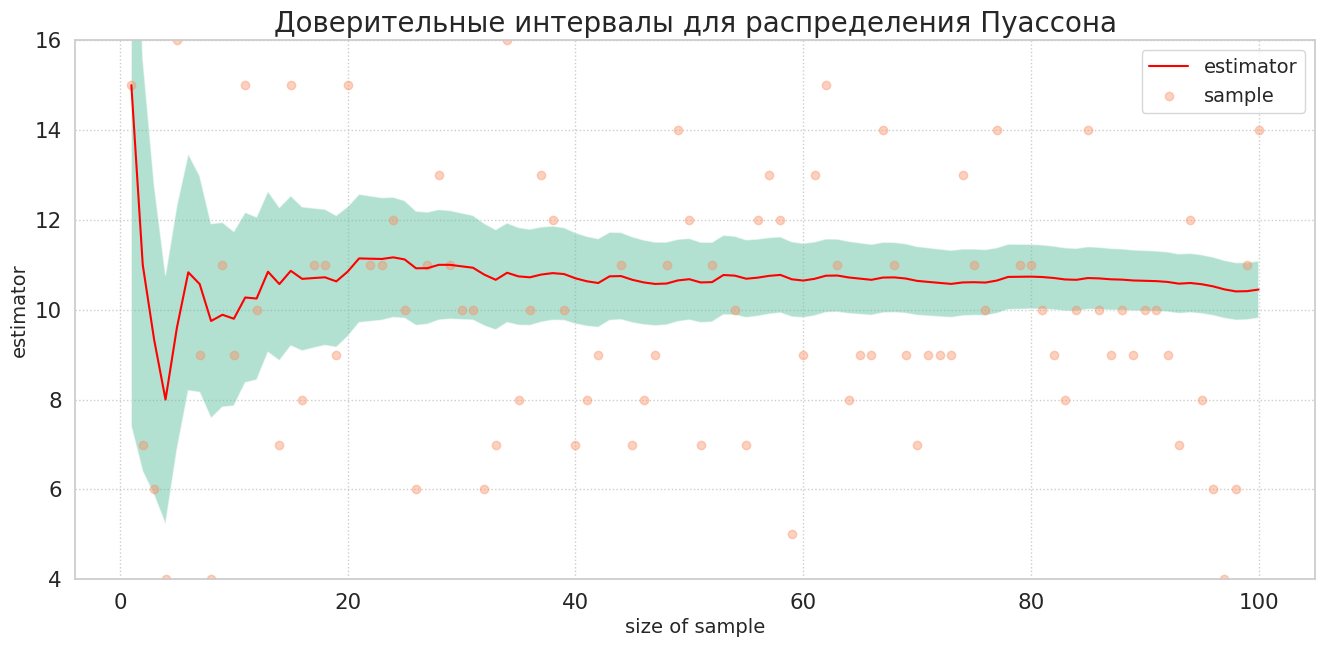

In [5]:
theta = 10
n = np.arange(1, N + 1, dtype=float)
sample_poiss = sps.poisson(theta).rvs(size=N)
estimator_poiss = np.cumsum(sample_poiss) / np.arange(1, N + 1)
left_poiss = estimator_poiss - np.sqrt(estimator_poiss) * sps.norm.ppf((1 + alpha) / 2) / np.sqrt(n)
right_poiss = estimator_poiss - np.sqrt(estimator_poiss) * sps.norm.ppf((1 - alpha) / 2) / np.sqrt(n)
draw_confidence_interval(left_poiss, right_poiss, estimator_poiss, sample_poiss, "Доверительные интервалы для распределения Пуассона")
plt.ylim(4, 16)

### 4. Гамма-распределение, $(\theta, \lambda) = (10, 3)$, $\lambda$ известна
Интервал Вальда для Гамма распределения
$$
\frac{\beta}{\overline{X}} - \frac{\sqrt{\beta}u_{\frac{1+\alpha}{2}}}{\sqrt{n}\overline{X}} < \frac{\beta}{\theta} < \frac{\beta}{\overline{X}} + \frac{\sqrt{\beta}u_{\frac{1+\alpha}{2}}}{\sqrt{n}\overline{X}}
$$

(-1.0, 20.0)

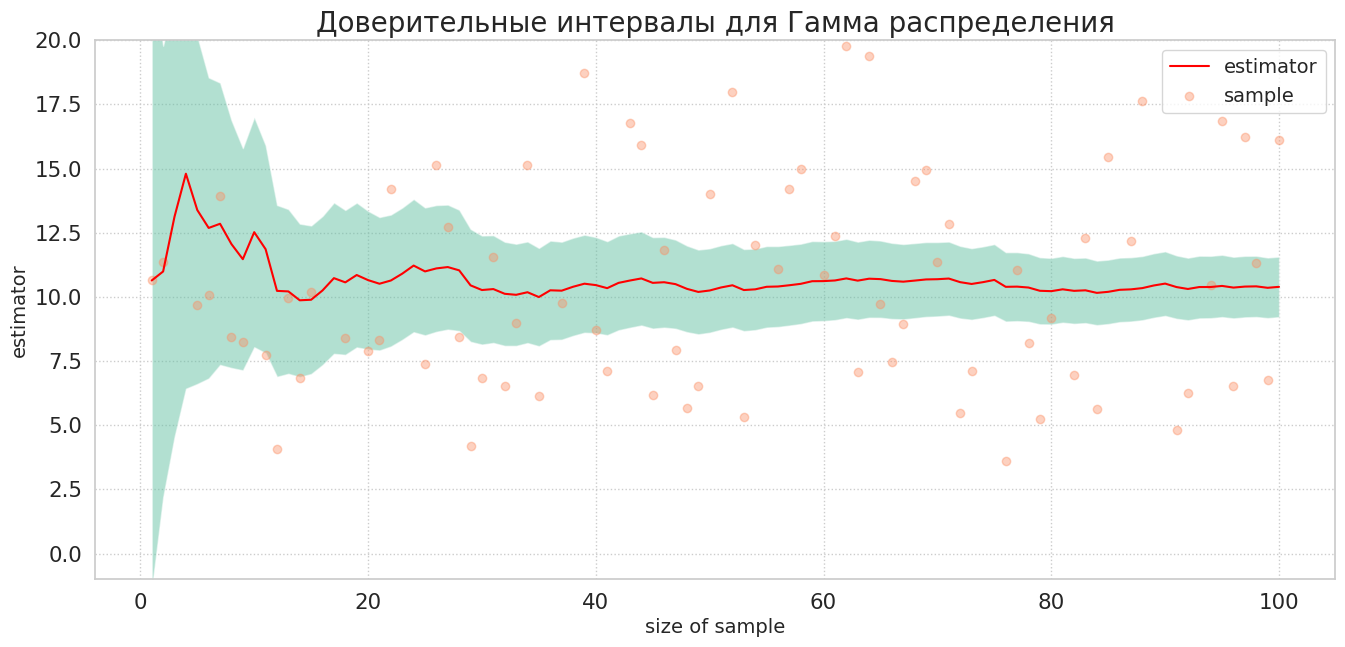

In [6]:
n = np.arange(1, N + 1, dtype=float)
sample_gamma = sps.gamma(a=3, scale=1/10).rvs(size=N)
estimator_gamma = np.cumsum(sample_gamma) / np.arange(1, N + 1)
left_gamma = -1 * np.sqrt(3) * sps.norm.ppf((1 + alpha) / 2) / np.sqrt(n) / estimator_gamma + 3 / estimator_gamma
right_gamma = np.sqrt(3) * sps.norm.ppf((1 + alpha) / 2) * np.power(np.sqrt(n) * estimator_gamma, -1) + 3 / estimator_gamma
draw_confidence_interval(left_gamma, right_gamma, 3 / estimator_gamma, 3 / sample_gamma, "Доверительные интервалы для Гамма распределения")
plt.ylim(-1, 20)

Сделайте выводы о размерах и форме доверительных интервалов для каждого случая.

__Вывод__:  
Первый доверительный интервал отличается по форме от остальных тем, что он односторонний, это связано с выбором оценки. Поэтому по ширине он уже всех.  
Второй интервал уже является симметричным и получился самым узким по сравнению с другими двумя не односторонними интервалами.  
Третий интервал не является симметричным и средний по ширине.  
А третий интервал оказался самым широким и симметричным.  
Также последние три интервала повторяют форму оценки, как видно по графикам.  
Еще можно отметить, что первый интервал имеет самую большую скорость сходимости, у последних трех она меньше.

# Задача 2

Для $n = 100$ оцените для кажого пункта предыдущей задачи вероятность попадания истинного значения
$\theta$ в интервал. Для этого нужно сделать слудующее:
1. Сгенерируйте достаточно много выборок из $P_{\theta}$
2. Постройте по каждой из них интервалы для $\widehat{\theta}$
3. Определите, сколько раз истинное значение $\theta.$ попадает в построенные интервалы. Таким способом будет
построена бернуллиевская выборка, по ней оцените вероятность.

Предположите, какое количество выборок нужно взять. Обоснуйте свой выбор.

__Ответ:__
Для того, чтобы понять какое нужно количество выборок, рассмотрим доверительный интервал распределения бернулли:
$$
(\overline{X} - u_{\frac{1 + \alpha}{2}}\sqrt{\frac{\overline{X}(1 - \overline{X})}{n}}, \overline{X} - u_{\frac{1 - \alpha}{2}}\sqrt{\frac{\overline{X}(1 - \overline{X})}{n}})
$$
Также можно примерно оценить длину этого интервала:  
Так как числитель ограничен константой, которая значительно меньше $\sqrt{n}$, то длина равна примерно $\frac{1}{\sqrt{n}}$. А ошибка у нас может быть только начиная с 2-3 знака, так как $\alpha = 0.95$, значит $\sqrt{n} \ge 10^{2}$ Поэтому возьмем n = 10000, чтобы не ждать по 6 минут пока посчитается

In [7]:
n = 100
n_samples = 10000

### Равномерное распределение

In [8]:
in_interval = []

for i in range(n_samples):
    sample = sps.uniform(loc=0, scale=10).rvs(size=n)
    estimator = np.max(sample)
    left = estimator
    right = estimator / (1 - sps.expon.ppf(alpha) / n)
    in_interval.append(1 if (10 >= left and 10 <= right) else 0)

p = np.sum(np.array(in_interval)) / len(in_interval)
print(r'Вероятность попадания истинного значения $\theta$ в интервал: ', p)

Вероятность попадания истинного значения $\theta$ в интервал:  0.9512


### Распределение Коши

In [9]:
in_interval = []

for i in range(n_samples):
    sample = sps.cauchy(loc=10).rvs(size=n)
    estimator = np.median(sample)
    left = -np.pi / (2 * np.sqrt(n)) * sps.norm.ppf((1 + alpha) / 2) + estimator
    right = -np.pi / (2 * np.sqrt(n)) * sps.norm.ppf((1 - alpha) / 2) + estimator
    in_interval.append(1 if (10 >= left and 10 <= right) else 0)

p = np.sum(np.array(in_interval)) / len(in_interval)
print(r'Вероятность попадания истинного значения $\theta$ в интервал: ', p)

Вероятность попадания истинного значения $\theta$ в интервал:  0.9465


### Распределение Пуассона

In [10]:
in_interval = []

for i in range(n_samples):
    sample = sps.poisson(10).rvs(size=N)
    estimator = np.mean(sample)
    left = estimator - np.sqrt(estimator) * sps.norm.ppf((1 + alpha) / 2) / np.sqrt(n)
    right = estimator - np.sqrt(estimator) * sps.norm.ppf((1 - alpha) / 2) / np.sqrt(n)
    in_interval.append(1 if (10 >= left and 10 <= right) else 0)

p = np.sum(np.array(in_interval)) / len(in_interval)
print(r'Вероятность попадания истинного значения $\theta$ в интервал: ', p)

Вероятность попадания истинного значения $\theta$ в интервал:  0.9532


### Гамма-распределение

In [11]:
in_interval = []

for i in range(n_samples):
    sample = sps.gamma(a=3, scale=1/10).rvs(size=N)
    estimator = np.mean(sample)
    left = -1 * np.sqrt(3) * sps.norm.ppf((1 + alpha) / 2) / np.sqrt(n) / estimator + 3 / estimator
    right = np.sqrt(3) * sps.norm.ppf((1 + alpha) / 2) / np.sqrt(n) / estimator + 3 / estimator
    in_interval.append(1 if (10 >= left and 10 <= right) else 0)

p = np.sum(np.array(in_interval)) / len(in_interval)
print(r'Вероятность попадания истинного значения $\theta$ в интервал: ', p)

Вероятность попадания истинного значения $\theta$ в интервал:  0.9522


Сделайте выводы.

__Выводы__:
По результатам вероятность попадания истинного значения $\theta$ в наши интервалы примерно одинаковая и равна около 0.95. Значит эти интервалы так же с большой вероятностью подходят в качестве интервалов для $\theta$ с $\alpha = 0.95$

# Задача 3

В этой задаче мы построим точный и асимптотический доверительный интевалы для нормального распределения и сравним их.

Пусть $X_1, \dots, X_n$ — выборка из нормального распределения со средним $a$ и дисперсией $\sigma^2$, причем $\sigma$ неизвестна. Выпишите формулы

* точного доверительного итервала уровня доверия $\alpha$ для $a$:

* асимптотического доверительного итервала уровня доверия $\alpha$ для $a$


Точный доверительный интервал:
$$
\overline{X} - t_{n-1, \frac{1 + \alpha}{2}}\frac{s}{\sqrt{n - 1}} < \theta < \overline{X} + t_{n-1, \frac{1 + \alpha}{2}}\frac{s}{\sqrt{n - 1}} 
$$
Асимптотический доверительный интервал:
$$
\overline{X} - \frac{z_{\frac{1+\alpha}{2}}s}{\sqrt{n}} < \theta < \overline{X} + \frac{z_{\frac{1+\alpha}{2}}s}{\sqrt{n}}
$$

Для $n=30, \,a = 0$ постройте __на одном графике__ точный и асимптотический доверительный интервал, а также отметьте линией истинное значение $a$

In [12]:
def calculate_conf_interval(
    sample: np.ndarray, 
    alpha: float = 0.95
):
    """Вычисление точного доверительного интервала уровня доверия alpha. """
    n = np.arange(1, len(sample) + 1)
    mean = np.cumsum(sample) / n
    s = np.sqrt(np.cumsum(sample ** 2) / n - mean ** 2)
    quantile = [sps.t(i).ppf((1 + alpha) / 2) for i in n]
    left = mean - quantile * s / np.sqrt(n)
    right = mean + quantile * s / np.sqrt(n)
    return left, right

In [13]:
def calculate_asymptotic_conf_interval(
    sample: np.ndarray, 
    alpha: float = 0.95
):
    """Вычисление асимптотического доверительного интервала уровня доверия alpha. """
    n = np.arange(1, len(sample) + 1)
    mean = np.cumsum(sample) / n
    s = np.sqrt(np.cumsum(sample ** 2) / n - mean ** 2)
    quantile = sps.norm().ppf((1 + alpha) / 2)
    left = mean - quantile * s / np.sqrt(n)
    right = mean + quantile * s / np.sqrt(n)
    return left, right

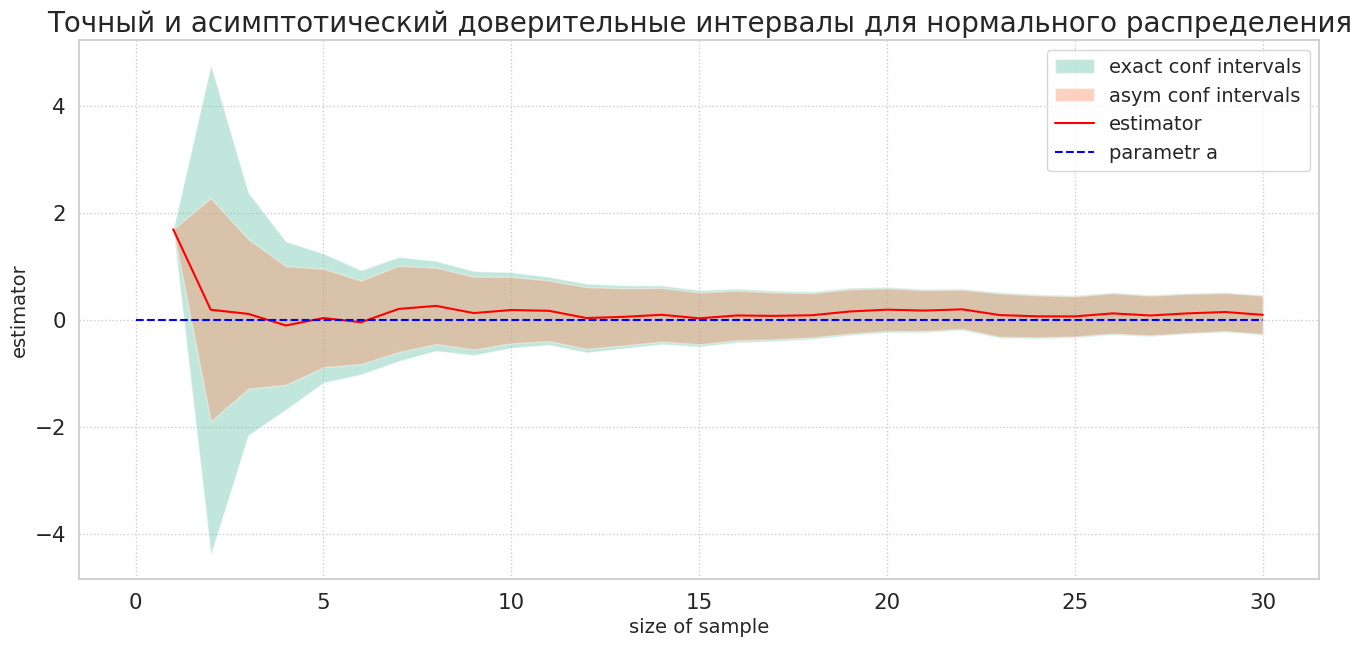

In [14]:
N = 30
a = 0
sample = sps.norm(loc=a).rvs(N)
estimator = np.cumsum(sample) / np.arange(1, N + 1)

left_conf, right_conf = calculate_conf_interval(sample=sample)
left_asym, right_asym = calculate_asymptotic_conf_interval(sample=sample)
grid = np.arange(1, N + 1)
plt.figure(figsize=(16, 7))
plt.fill_between(grid, left_conf, right_conf, alpha=0.4, label="exact conf intervals")
plt.fill_between(grid, left_asym, right_asym, alpha=0.4, label="asym conf intervals")
plt.plot(grid, estimator, label='estimator', c='r')
plt.hlines(a, 0, N, linestyle = '--', label="parametr a", colors='b')
plt.title("Точный и асимптотический доверительные интервалы для нормального распределения", fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.xlabel('size of sample', fontsize=14)
plt.ylabel('estimator', fontsize=14)
plt.grid(ls=':')
plt.show()

Сделайте выводы. В каких случаях уместно использовать асимптотический интервал вместо точного?
__Вывод__: По графику можно заметить, что точный доверительный интервал имеет чуть большую длину чем асимптотический. Но начиная где то с размера выборки равной 15 они отличаются незаметно. Получается если нам нужно длину побольше, то лучше взять асимптотический интервал

# Задача 4

В этой задаче мы проанализируем изменение индекса качества воздуха (air quality index, AQI) для двух мегаполисов Индии за последние годы. Данные взяты с Kaggle (https://www.kaggle.com/rohanrao/air-quality-data-in-india)

In [15]:
!gdown 1DE7zVPsfSk8hyEdWRf4WPr3I0w5GUOpp

Downloading...
From: https://drive.google.com/uc?id=1DE7zVPsfSk8hyEdWRf4WPr3I0w5GUOpp
To: /home/any/Programs/statistics_practice_mipt/city_day.csv
100%|██████████████████████████████████████| 2.57M/2.57M [00:00<00:00, 3.77MB/s]


Загрузите файл `city_day.csv`. Нам понадобятся столбцы `City`, `Date` и `AQI`. При этом учтите, что:
* В дальнейшем мы будем работать с датами, поэтому используйте аргумент `parse_dates` чтобы корректо их распарсить
* Данные содержат пропуски, которые нужно удалить

In [16]:
df = pd.read_csv('city_day.csv', parse_dates=['Date'])[['City', 'Date', 'AQI']].dropna()

Для удобства сохраните в отдельные поля `Month` и `Year` соответственно год и месяц, когда производились замеры

In [17]:
df.loc[:, 'Month'] = df['Date'].dt.month
df.loc[:, 'Year'] = df['Date'].dt.year
df.head(10)

,City,Date,AQI,Month,Year
28,Ahmedabad,2015-01-29,209.0,1,2015
29,Ahmedabad,2015-01-30,328.0,1,2015
30,Ahmedabad,2015-01-31,514.0,1,2015
31,Ahmedabad,2015-02-01,782.0,2,2015
32,Ahmedabad,2015-02-02,914.0,2,2015
33,Ahmedabad,2015-02-03,660.0,2,2015
34,Ahmedabad,2015-02-04,294.0,2,2015
35,Ahmedabad,2015-02-05,149.0,2,2015
36,Ahmedabad,2015-02-06,190.0,2,2015
37,Ahmedabad,2015-02-07,247.0,2,2015


Нас будут интересовать два города: Мумбаи (Mumbai) и Калькутта (Kolkata). Сохраните данные по этим двум городам для всех днней с 1 июля 2018 года включительно

In [18]:
mumbai = df[(df['City'] == 'Mumbai') & (((df['Year'] == 2018) & (df['Month'] >= 7)) | (df['Year'] > 2018))]
kolkata = df[(df['City'] == 'Kolkata') & (((df['Year'] == 2018) & (df['Month'] >= 7)) | (df['Year'] > 2018))]
mumbai

,City,Date,AQI,Month,Year
23132,Mumbai,2018-07-01,88.0,7,2018
23133,Mumbai,2018-07-02,77.0,7,2018
23134,Mumbai,2018-07-03,89.0,7,2018
23135,Mumbai,2018-07-04,75.0,7,2018
23136,Mumbai,2018-07-05,68.0,7,2018
...,...,...,...,...,...
23859,Mumbai,2020-06-27,64.0,6,2020
23860,Mumbai,2020-06-28,64.0,6,2020
23861,Mumbai,2020-06-29,54.0,6,2020
23862,Mumbai,2020-06-30,54.0,6,2020


В предыдущих задачах мы строили доверительные интервалы в предположении, что выборка взята из параметрического семейства распределений. Но что делать в случае, когда подобное предположение сделать нельзя? Оказывается, в этом случае можно строить доверительный интервал с помощью бутстрепа.

Пусть $X_1, \dots, X_n$ — выборка, для которой мы хотим оценить некоторую величину $\theta$. Построим $k$ бутстепных выборок, и получим по ним оценки $\theta^*_1, \dots, \theta^*_k$. Отсортируем их, чтобы получить вариационный ряд $\theta^*_{(1)}, \dots, \theta^*_{(k)}$. Тогда получим, что
$$
C^* = \left(\theta^*_{(\lfloor k (1 + \alpha) / 2 \rfloor)},
\theta^*_{(\lceil k (1 - \alpha) / 2 \rceil)} \right)
$$
будет (приблизительным) доверительным интервалом для $\theta$ уровня доверия $\alpha$.

Для каждого месяца с июля 2018 по июнь 2020 включтельно постройте бутстрепный доверительный интервал для __среднего значения AQI__. В этом вам помогут следующие вспомогательные функции:

In [19]:
def get_dataset_by_month(
    df: pd.DataFrame, 
    year: int,
    month: int
):
    """ Сохранение в массив данные для указанного месяца и года."""
    
    return df[(df['Year'] == year) & (df['Month'] == month)]['AQI'].to_numpy()

In [20]:
def get_bootstrap_samples(
    sample: np.ndarray,
    k: int = 1000
):
    """ Построение k бутстрепных выборок для указанной выборки. """
    
    return np.array([np.random.choice(sample, size=sample.shape[0], replace=True) for i in range(k)])

In [21]:
def bootstrap_conf_interval(
    sample: np.ndarray,
    estimator: Callable = lambda x: np.mean(x, axis=-1),
    alpha: float = 0.95,
):
    """ Построение бутстрепных доверительных интервалов. """
    
    estimators = np.array([estimator(sample[i]) for i in range(sample.shape[0])])
    sorted_est = np.sort(estimators)
    left = sorted_est[math.floor(sample.shape[0] * (1 + alpha) / 2) - 1]
    right = sorted_est[math.ceil(sample.shape[0] * (1 - alpha) / 2) - 1]
    return left, right

Постройте на одном графике доверительные интервалы для Мумбаи и Калькутты. Также отметьте точками на графике истинный средний AQI и соедините точки линиями. Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

In [22]:
ym = mumbai[['Year', 'Month']].drop_duplicates().values[:-1]
labels = [f"{year}-{month}" for year, month in ym] # номера месяцев для подписей на графике 

left_m = []
right_m = []
left_k = []
right_k = []
aqi_mean_m = []
aqi_mean_k = []
for i in ym:
    sample = get_dataset_by_month(mumbai, i[0], i[1])
    aqi_mean_m.append(np.mean(sample))
    bootstrap = get_bootstrap_samples(sample)
    left, right = bootstrap_conf_interval(bootstrap)
    left_m.append(left)
    right_m.append(right)

    sample = get_dataset_by_month(kolkata, i[0], i[1])
    aqi_mean_k.append(np.mean(sample))
    bootstrap = get_bootstrap_samples(sample)
    left, right = bootstrap_conf_interval(bootstrap)
    left_k.append(left)
    right_k.append(right)
    

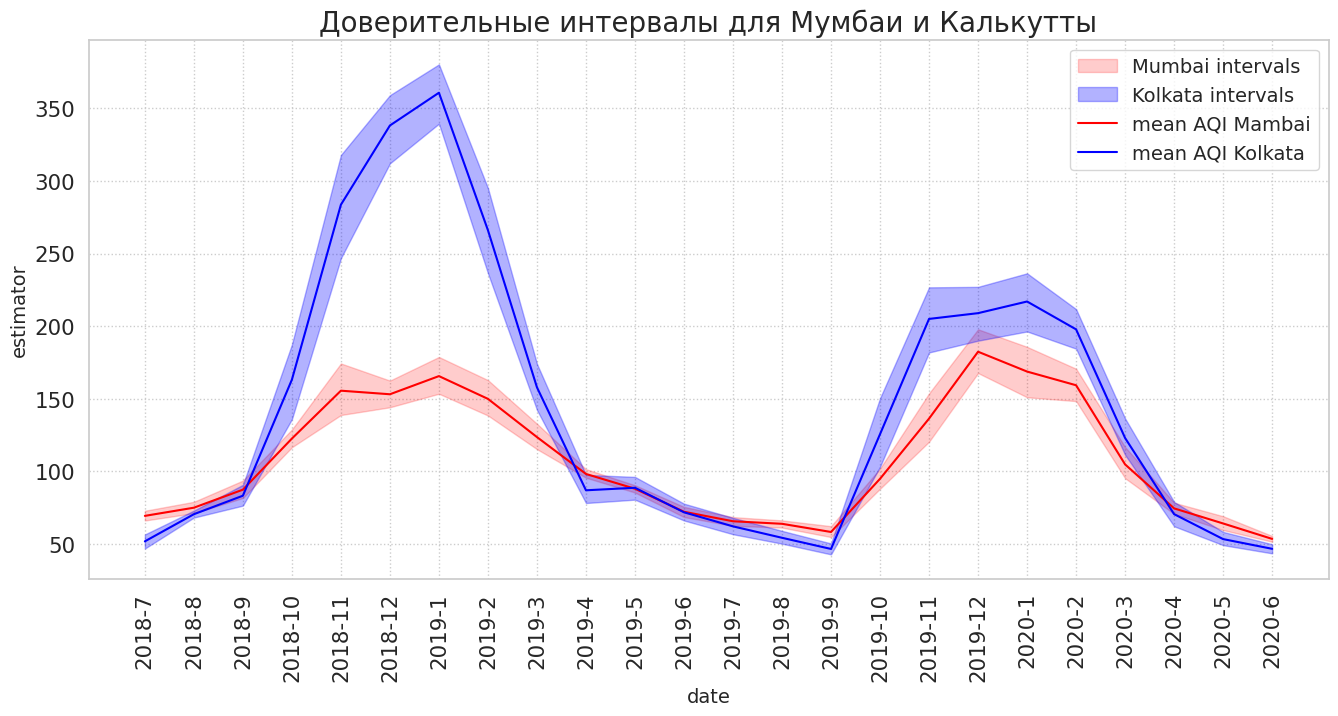

In [23]:
grid = np.arange(0, ym.shape[0])

plt.figure(figsize=(16, 7))
plt.fill_between(grid, left_m, right_m, alpha=0.2, label='Mumbai intervals', color='red')
plt.fill_between(grid, left_k, right_k, alpha=0.3, label='Kolkata intervals', color='blue')
plt.plot(grid, aqi_mean_m, c='r', label='mean AQI Mambai')
plt.plot(grid, aqi_mean_k, c='b', label='mean AQI Kolkata')
plt.xticks(grid, labels, rotation ='vertical')
plt.title("Доверительные интервалы для Мумбаи и Калькутты", fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.xlabel('date', fontsize=14)
plt.ylabel('estimator', fontsize=14)
plt.grid(ls=':')
plt.show()

Посмотрите на получившийся график. Видны ли в нем какие-либо закономерности? С чем они могут быть связаны?  
__Вывод__: Видно закономерность, что качество воздуха в обоих городах ухудшается зимой и достигает своего минимума в январе. Это может быть связано с тем, что летом определенное погодные условия в обоих городах и воздух отчищается. Так же можно сделать вывод, что в Мумбаи качество воздуха лучше, а это уже может быть связано с тем, что Калькутта более населенный город и в нем больше всяких отходов

Теперь давайте сравним качество воздуха в апреле 2019 и апреле 2020 годов. Постройте __на одном графике__
* доверительные интервалы для апреля 2019 и апреля 2020 для Мумбаи
* истинные средние значения (с помощью `plt.hlines`)
* точки выборки

Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

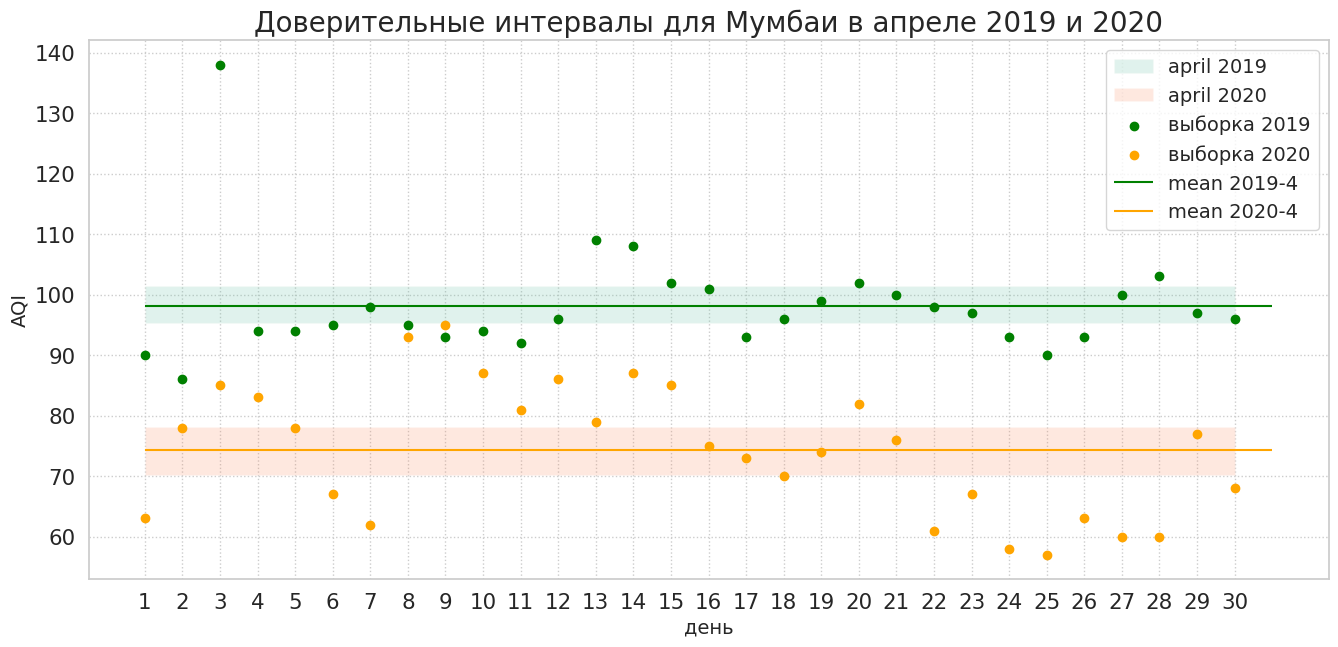

In [24]:
sample_2019 = get_dataset_by_month(mumbai, 2019, 4)
sample_2020 = get_dataset_by_month(mumbai, 2020, 4)
mean_2019 = np.mean(sample_2019)
mean_2020 = np.mean(sample_2020)
left_first, right_first = bootstrap_conf_interval(get_bootstrap_samples(sample_2019))
left_second, right_second = bootstrap_conf_interval(get_bootstrap_samples(sample_2020))

grid = np.arange(1, 31)

plt.figure(figsize=(16, 7))
plt.fill_between(grid, left_first * np.ones(30), right_first * np.ones(30), label='april 2019', alpha=0.2)
plt.fill_between(grid, left_second * np.ones(30), right_second * np.ones(30), label='april 2020', alpha=0.2)
plt.scatter(grid, sample_2019, label="выборка 2019", color='green')
plt.scatter(grid, sample_2020, label="выборка 2020", color='orange')
plt.hlines(mean_2019, 1, 31, label='mean 2019-4', color='green')
plt.hlines(mean_2020, 1, 31, label='mean 2020-4', color='orange')
plt.title("Доверительные интервалы для Мумбаи в апреле 2019 и 2020", fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.xlabel('день', fontsize=14)
plt.ylabel('AQI', fontsize=14)
plt.xticks(grid)
plt.grid(ls=':')
plt.show()

Теперь проделайте то же самое для Калькутты

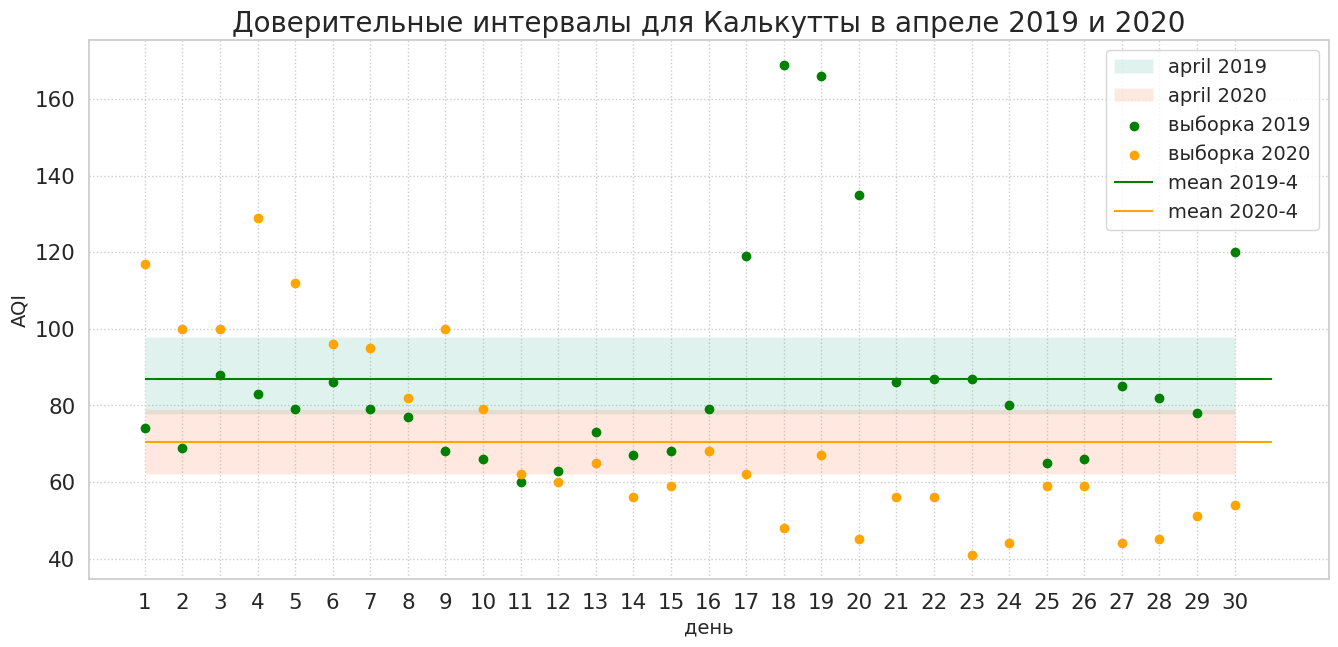

In [25]:
sample_2019 = get_dataset_by_month(kolkata, 2019, 4)
sample_2020 = get_dataset_by_month(kolkata, 2020, 4)
mean_2019 = np.mean(sample_2019)
mean_2020 = np.mean(sample_2020)
left_first, right_first = bootstrap_conf_interval(get_bootstrap_samples(sample_2019))
left_second, right_second = bootstrap_conf_interval(get_bootstrap_samples(sample_2020))

grid = np.arange(1, 31)

plt.figure(figsize=(16, 7))
plt.fill_between(grid, left_first * np.ones(30), right_first * np.ones(30), label='april 2019', alpha=0.2)
plt.fill_between(grid, left_second * np.ones(30), right_second * np.ones(30), label='april 2020', alpha=0.2)
plt.scatter(grid, sample_2019, label="выборка 2019", color='green')
plt.scatter(grid, sample_2020, label="выборка 2020", color='orange')
plt.hlines(mean_2019, 1, 31, label='mean 2019-4', color='green')
plt.hlines(mean_2020, 1, 31, label='mean 2020-4', color='orange')
plt.title("Доверительные интервалы для Калькутты в апреле 2019 и 2020", fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.xlabel('день', fontsize=14)
plt.ylabel('AQI', fontsize=14)
plt.xticks(grid)
plt.grid(ls=':')
plt.show()

Сделайте выводы. Что можно сказать про доверительные интервалы в каждом из случаев?
__Вывод__: Видно, что у обоих городов качество воздуха улучшилось, но у Мумбаи больше улучшилось. Скорее всего в городах ввелись какие то правила, которые улучшают экологию города и уменьшают загрязнения